In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("combined_dataset.csv")

In [3]:
df.head()

,Flight No.,Date,Time,Version Booster,Launch site,Payload,Payload mass,Orbit,Customer,Launch Outcome,Booster landing,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,04-06-2010,18:45,F9 v1.0B0003.1,CCAFS,Dragon Spacecraft Qualification Unit,0,LEO,SpaceX,Success\n,0,1,False,False,False,NaN,1,0,B0003
1,2,22-05-2012,07:44,F9 v1.0B0005.1,CCAFS,Dragon,525 kg,LEO,NASA,Success,0,1,False,False,False,NaN,1,0,B0005
2,3,01-03-2013,15:10,F9 v1.0B0007.1,CCAFS,SpaceX CRS-2,"4,877 kg",LEO,NASA,Success\n,0,1,False,False,False,NaN,1,0,B0007
3,4,29-09-2013,16:00,F9 v1.1B1003,VAFB,CASSIOPE,500 kg,Polar orbit,MDA,Success,0,1,False,False,False,NaN,1,0,B1003
4,5,03-12-2013,22:41,F9 v1.1,CCAFS,SES-8,"3,170 kg",GTO,SES,Success,0,1,False,False,False,NaN,1,0,B1004


Payload V/s Flight Number and overlay the outcomeof the launch

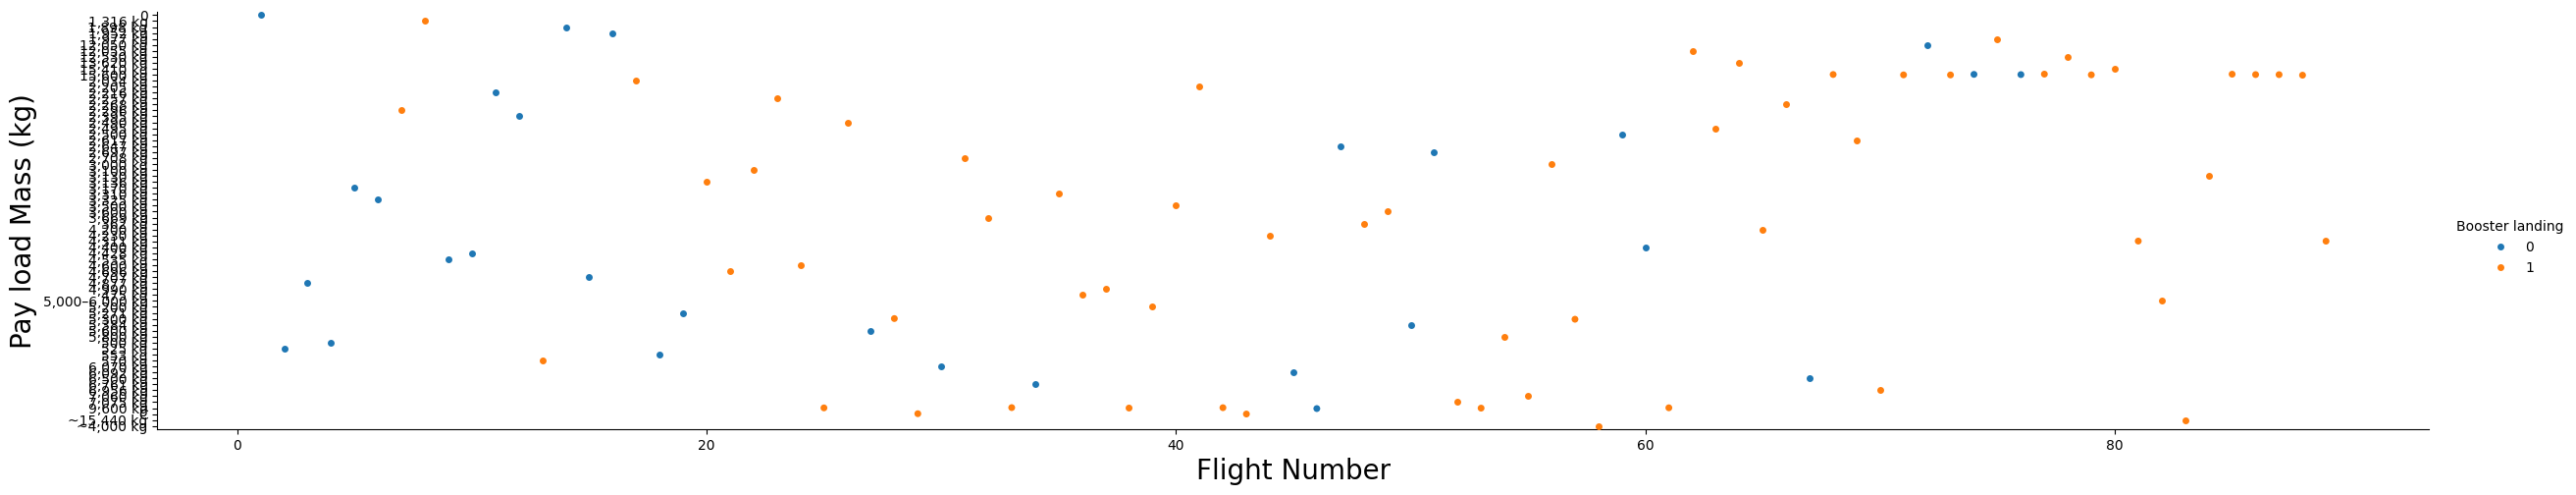

In [4]:
df_sorted = df.sort_values(by = "Payload mass")
sns.catplot(y="Payload mass", x="Flight No.",hue = "Booster landing", data=df_sorted, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

Flight No. v/s Launch Site

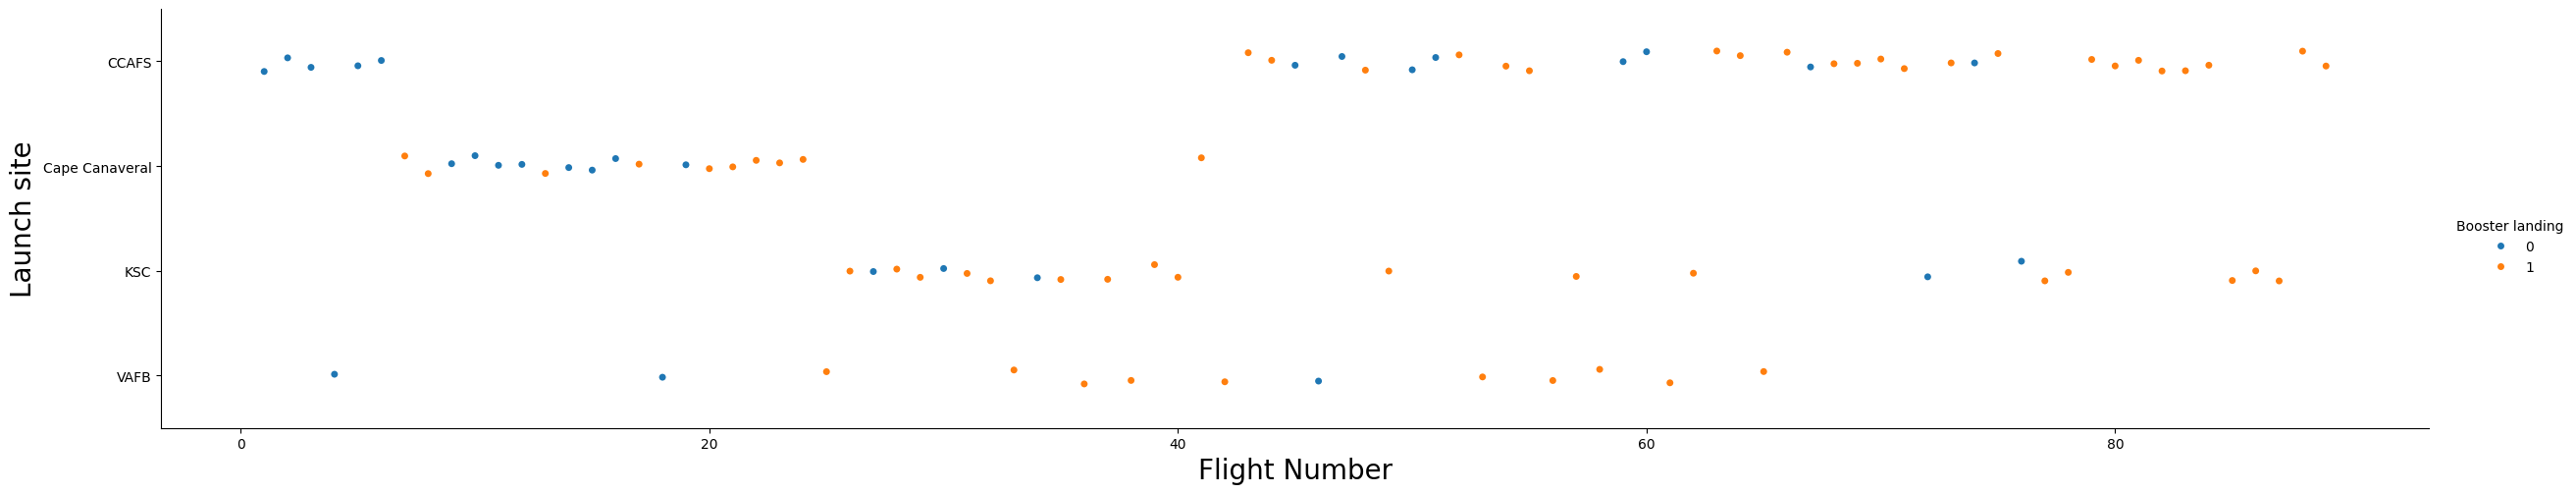

In [5]:
sns.catplot(y = "Launch site", x= "Flight No.", hue = "Booster landing", data=df_sorted, aspect = 5)
plt.xlabel("Flight Number", fontsize =20)
plt.ylabel("Launch site", fontsize = 20)
plt.show()

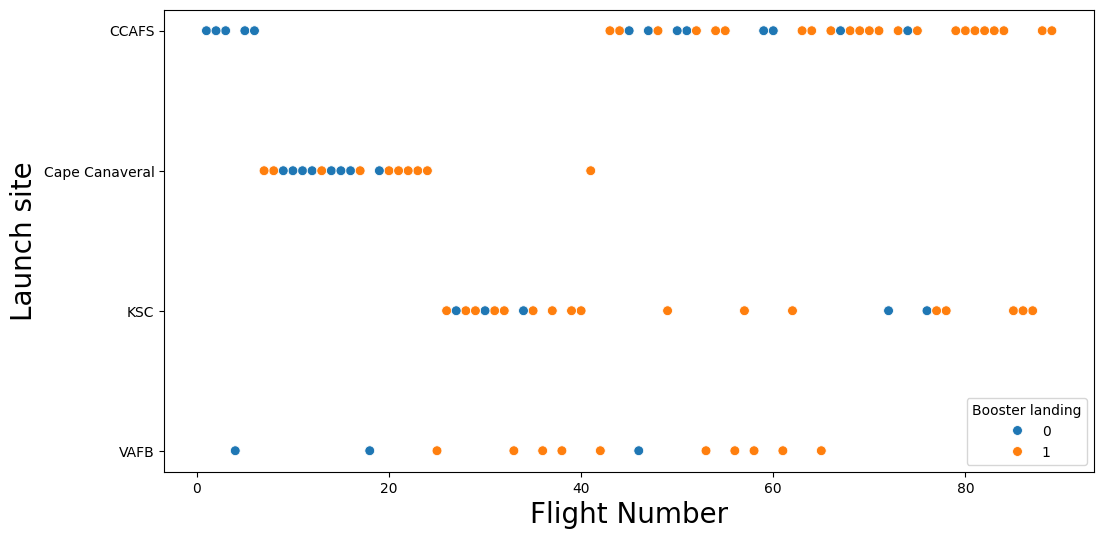

In [6]:
plt.figure(figsize = (12,6))
sns.scatterplot(y = "Launch site", x= "Flight No.", hue = "Booster landing", data=df_sorted, s = 50)
plt.xlabel("Flight Number", fontsize =20)
plt.ylabel("Launch site", fontsize = 20)
plt.show()

### Task 2: Payload v/s Launch *site*

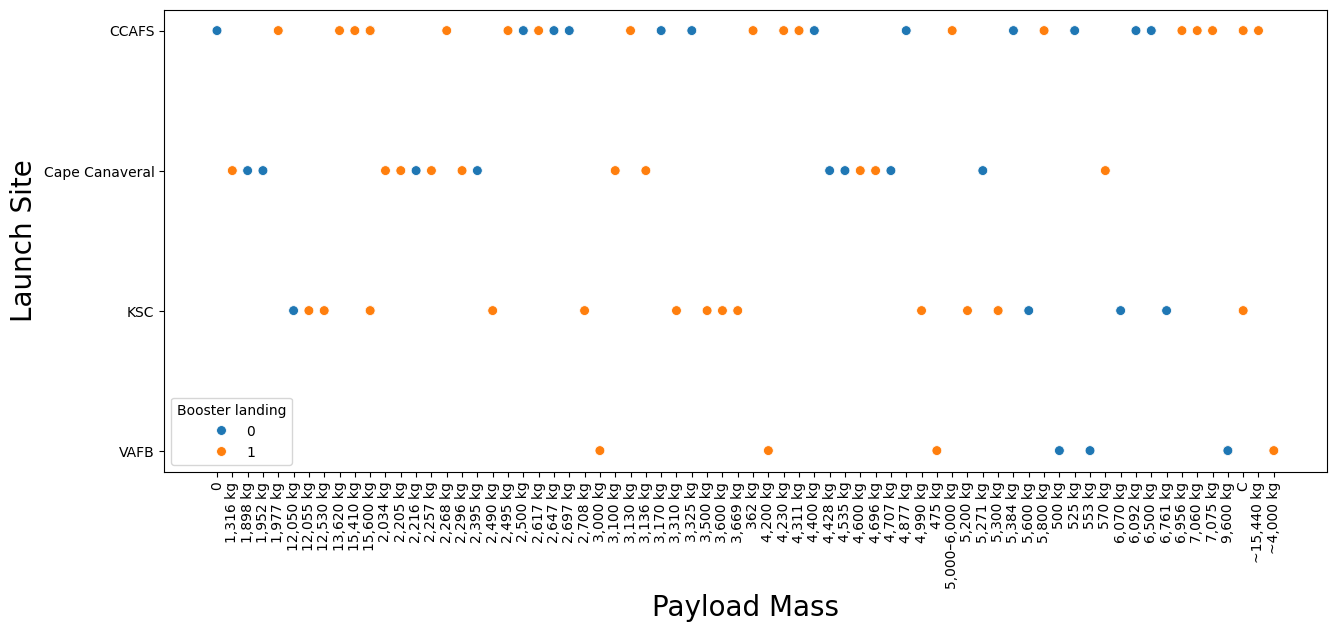

In [7]:
plt.figure(figsize = (15,6))
sns.scatterplot(y= "Launch site", x= "Payload mass", hue = "Booster landing", data=df_sorted, s= 50)
plt.xlabel("Payload Mass", fontsize = 20)
plt.ylabel("Launch Site", fontsize = 20)
plt.xticks(rotation=90)
plt.show()


Now if you observe Payload Vs. Launch Site scatter point chart you will find for the VAFB-SLC launchsite there are no rockets launched for heavypayload mass(greater than 10000).

### TASK  3: Visualize the relationship between success rate of each orbit type


In [8]:
orbit_mean_val = df_sorted.groupby("Orbit")["Booster landing"].mean().reset_index()
print(orbit_mean_val)


         Orbit  Booster landing
0          GTO         0.555556
1          HEO         1.000000
2          LEO         0.704545
3          MEO         0.666667
4        Polar         0.833333
5  Polar orbit         0.000000
6          SSO         1.000000
7  Sub-orbital         0.000000


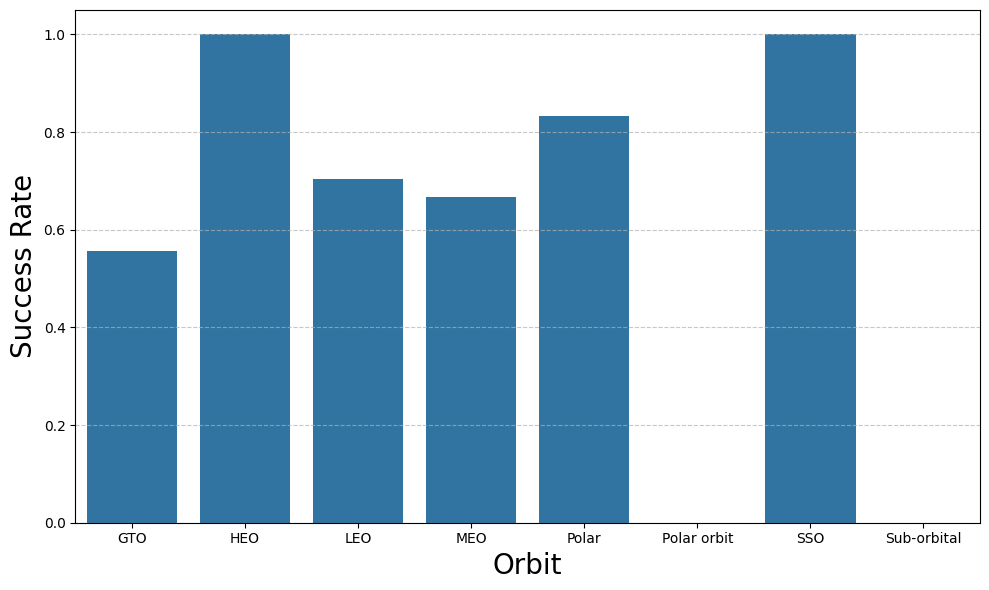

In [9]:
plt.figure(figsize = (10,6))
sns.barplot(x = orbit_mean_val["Orbit"] ,y = orbit_mean_val["Booster landing"])
plt.xlabel("Orbit", fontsize = 20)
plt.ylabel("Success Rate", fontsize = 20)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

The top 3 Orbits with high success rates are:
1. HEO
2. SSO
3. Polar

### TASK  4: Visualize the relationship between FlightNumber and Orbit type

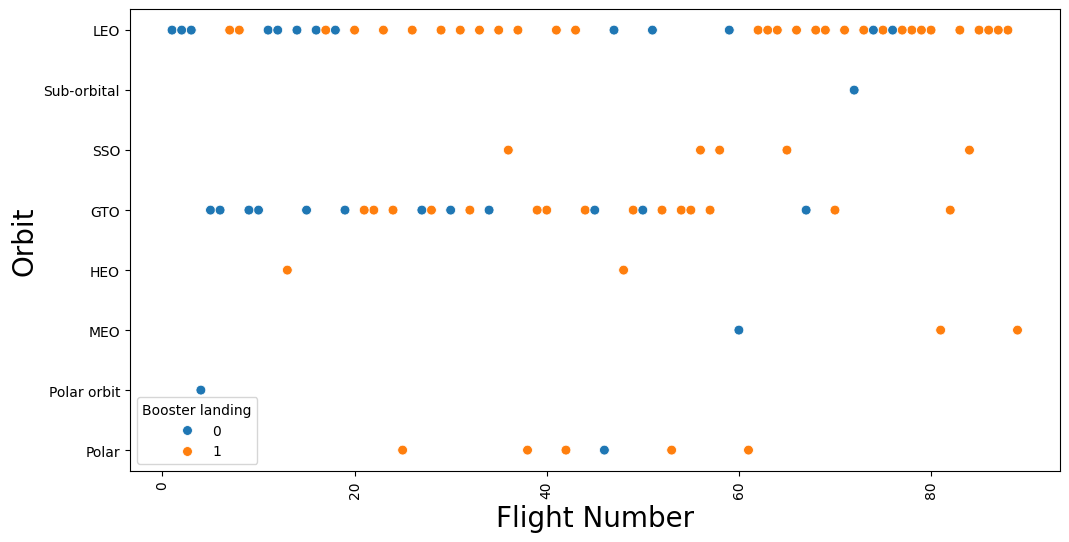

In [10]:
plt.figure(figsize=(12,6))
sns.scatterplot(x= "Flight No." , y= "Orbit", hue="Booster landing",data = df_sorted, s = 50)
plt.xlabel("Flight Number", fontsize = 20)
plt.ylabel("Orbit", fontsize = 20)
plt.xticks(rotation = 90)
plt.show()


### TASK  5: Visualize the relationship between Payload and Orbit type

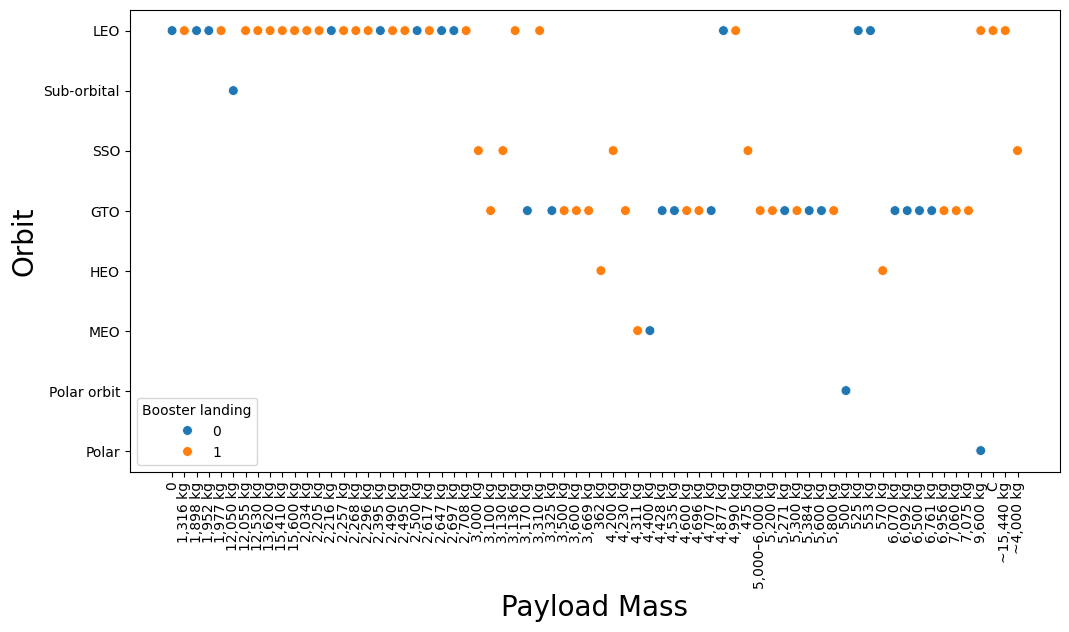

In [11]:
plt.figure(figsize=(12,6))
sns.scatterplot(x= "Payload mass" , y= "Orbit", hue="Booster landing",data = df_sorted, s = 50)
plt.xlabel("Payload Mass", fontsize = 20)
plt.ylabel("Orbit", fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

### TASK  6: Visualize the launch success yearly trend

In [12]:
df_sorted['Date'] = pd.to_datetime(df_sorted['Date'])

<ipython-input-12-e8253d42c1c2>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df_sorted['Date'] = pd.to_datetime(df_sorted['Date'])


In [13]:
df_sorted.head()

,Flight No.,Date,Time,Version Booster,Launch site,Payload,Payload mass,Orbit,Customer,Launch Outcome,Booster landing,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,2010-04-06,18:45,F9 v1.0B0003.1,CCAFS,Dragon Spacecraft Qualification Unit,0,LEO,SpaceX,Success\n,0,1,False,False,False,NaN,1,0,B0003
7,8,2014-07-14,15:15,F9 v1.1,Cape Canaveral,Orbcomm-OG2,"1,316 kg",LEO,Orbcomm,Success,1,1,False,False,True,NaN,1,0,B1007
13,14,2015-04-14,20:10,F9 v1.1,Cape Canaveral,SpaceX CRS-6,"1,898 kg",LEO,NASA,Success\n,0,1,True,False,True,5e9e3032383ecb761634e7cb,1,0,B1015
15,16,2015-06-28,14:21,F9 v1.1,Cape Canaveral,SpaceX CRS-7,"1,952 kg",LEO,NASA,Failure,0,1,True,False,True,5e9e3032383ecb6bb234e7ca,1,0,B1018
74,75,2020-07-03,04:50,F9 B5,CCAFS,SpaceX CRS-20,"1,977 kg",LEO,NASA,Success\n,1,2,True,True,True,5e9e3032383ecb267a34e7c7,5,5,B1059


In [14]:
df_sorted['Date'] = df_sorted['Date'].dt.year

In [15]:
df_sorted.head()

,Flight No.,Date,Time,Version Booster,Launch site,Payload,Payload mass,Orbit,Customer,Launch Outcome,Booster landing,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,2010,18:45,F9 v1.0B0003.1,CCAFS,Dragon Spacecraft Qualification Unit,0,LEO,SpaceX,Success\n,0,1,False,False,False,NaN,1,0,B0003
7,8,2014,15:15,F9 v1.1,Cape Canaveral,Orbcomm-OG2,"1,316 kg",LEO,Orbcomm,Success,1,1,False,False,True,NaN,1,0,B1007
13,14,2015,20:10,F9 v1.1,Cape Canaveral,SpaceX CRS-6,"1,898 kg",LEO,NASA,Success\n,0,1,True,False,True,5e9e3032383ecb761634e7cb,1,0,B1015
15,16,2015,14:21,F9 v1.1,Cape Canaveral,SpaceX CRS-7,"1,952 kg",LEO,NASA,Failure,0,1,True,False,True,5e9e3032383ecb6bb234e7ca,1,0,B1018
74,75,2020,04:50,F9 B5,CCAFS,SpaceX CRS-20,"1,977 kg",LEO,NASA,Success\n,1,2,True,True,True,5e9e3032383ecb267a34e7c7,5,5,B1059


In [16]:
success_rate_year = df_sorted.groupby('Date')['Booster landing'].mean().reset_index()
print(success_rate_year)

   Date  Booster landing
0  2010         0.000000
1  2012         0.000000
2  2013         0.000000
3  2014         0.333333
4  2015         0.333333
5  2016         0.714286
6  2017         0.833333
7  2018         0.611111
8  2019         0.900000
9  2020         0.842105


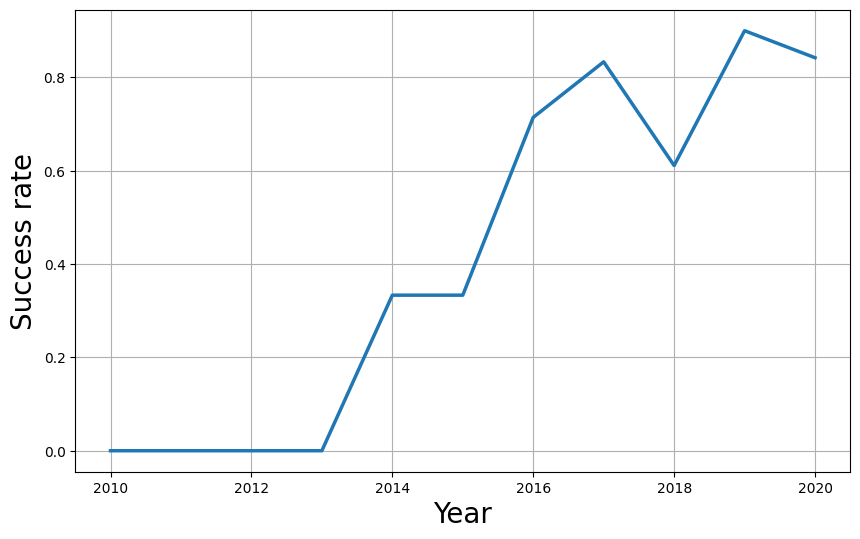

In [17]:
plt.figure(figsize = (10,6))
sns.lineplot( x= success_rate_year["Date"], y=success_rate_year["Booster landing"] ,data = success_rate_year, linewidth= 2.5 )
plt.xlabel("Year", fontsize= 20)
plt.ylabel("Success rate", fontsize= 20)
plt.grid(True)
plt.show()

# Features Engineering

In [18]:
features = df[['Flight No.', 'Payload mass', 'Orbit', 'Launch site', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,Flight No.,Payload mass,Orbit,Launch site,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,0,LEO,CCAFS,1,False,False,False,NaN,1,0,B0003
1,2,525 kg,LEO,CCAFS,1,False,False,False,NaN,1,0,B0005
2,3,"4,877 kg",LEO,CCAFS,1,False,False,False,NaN,1,0,B0007
3,4,500 kg,Polar orbit,VAFB,1,False,False,False,NaN,1,0,B1003
4,5,"3,170 kg",GTO,CCAFS,1,False,False,False,NaN,1,0,B1004


### TASK  7: Create dummy variables to categorical columns

In [19]:
features_one_hot = pd.get_dummies(features,columns =['Orbit','Launch site','LandingPad'] )
features_one_hot.head()

,Flight No.,Payload mass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Serial,Orbit_GTO,...,Orbit_Sub-orbital,Launch site_CCAFS,Launch site_Cape Canaveral,Launch site_KSC,Launch site_VAFB,LandingPad_5e9e3032383ecb267a34e7c7,LandingPad_5e9e3032383ecb554034e7c9,LandingPad_5e9e3032383ecb6bb234e7ca,LandingPad_5e9e3032383ecb761634e7cb,LandingPad_5e9e3033383ecbb9e534e7cc
0,1,0,1,False,False,False,1,0,B0003,0,...,0,1,0,0,0,0,0,0,0,0
1,2,525 kg,1,False,False,False,1,0,B0005,0,...,0,1,0,0,0,0,0,0,0,0
2,3,"4,877 kg",1,False,False,False,1,0,B0007,0,...,0,1,0,0,0,0,0,0,0,0
3,4,500 kg,1,False,False,False,1,0,B1003,0,...,0,0,0,0,1,0,0,0,0,0
4,5,"3,170 kg",1,False,False,False,1,0,B1004,1,...,0,1,0,0,0,0,0,0,0,0


In [20]:
features_one_hot['Payload mass'] = features_one_hot['Payload mass'].str.strip("'").str.replace(' kg', '').str.replace(',', '')

In [21]:
features_one_hot['Payload mass'] = pd.to_numeric(features_one_hot['Payload mass'], errors='coerce')

In [22]:
features_one_hot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 26 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Flight No.                           89 non-null     int64  
 1   Payload mass                         84 non-null     float64
 2   Flights                              89 non-null     int64  
 3   GridFins                             89 non-null     bool   
 4   Reused                               89 non-null     bool   
 5   Legs                                 89 non-null     bool   
 6   Block                                89 non-null     int64  
 7   ReusedCount                          89 non-null     int64  
 8   Serial                               89 non-null     object 
 9   Orbit_GTO                            89 non-null     uint8  
 10  Orbit_HEO                            89 non-null     uint8  
 11  Orbit_LEO                         

In [23]:
features_one_hot.to_csv('dataset_part_3.csv', index=False)